# Introducción al procesado de imágenes de para la segmentación de nebulosas.
#### Este tutorial es una introducción a las técnicas de procesado de imágenes digitales e inteligencia artificial (IA) aplicadas al problema de segmentación de nebulosas.
#### Los campos de procesado de imágenes, IA y astronomía son muy amplios y no es posible abarcar todas las técnicas en un tutorial de introducción. Pero se ha intentado que los ejemplos seleccionados sean representativos y permitan obtener una base para realizar posteriormente estudios más detallados si se desea.
#### El lenguage de programación Python es muy utilizado en distintos campos. En particular para temas de procesado de imágenes es interesante porque permite utilizar directamente muchas técnicas, sin necesidad de programarlo todo de cero. 
#### Una de las dificultades para la aplicación de la IA es entender cómo funcionan las técnicas y cómo se pueden combinar para tratar un problema determinado. En general será necesario seleccionar técnicas adecuadas, realizar adaptaciones o estudiar distintas configuraciones para el problema específico que se necesite resolver. 
#### Para entender cómo se pueden aplicar en la práctica es interesante realizar modificaciones en los ejemplos de código que se indican a continuación, por ejemplo cambiando algún parámetro y estudiando cómo afecta al resultado. También es recomendable consultar información en internet o libros especializados. En general el proceso de búsqueda y análisis de información es una parte importante en cualquier proyecto de investigación y desarrollo.

## Inicialización del entorno de programación.
#### Algunas técnicas pueden utilizar internamente números aleatorios (realmente son números pseudoaleatorios).
#### Como consecuencia al ejecutar varias veces una prueba se pueden obtener resultados distintos.
#### En ocasiones esto no supone un problema, por ejemplo si se están realizando pruebas interactivamente para entender cómo funciona una técnica.
#### Pero en cualquier caso es importante conocer este efecto. 
#### Para obtener resultados reproducibles se puede inicializar el entorno de programación como se indica en el siguiente ejemplo.

In [1]:
import numpy as np
import random as rn

# Inicializa el generador de números aleatorios de Numpy. 
# El paquete Numpy permite realizar diversas operaciones matemáticas de forma eficiente y es utilizado en muchas aplicaciones de IA.
# Es bastante habitual usar el valor 42 para inicializar el generador de números aleatorios, aunque se podría usar otro.
np.random.seed(42)

# Inicializa el generador de números aleatorios de Python.
rn.seed(42)

## Imágenes digitales.
#### Para trabajar con imágenes en un ordenador es útil representarlas como una estructura rectangular de elementos dispuestos en filas y columnas.
#### Cada elemento es un píxel que representa un punto de la imagen.
#### Un píxel tendrá asociado uno o más valores numéricos que indican algún parámetro de interés.
#### Las imágenes que consideramos tienen un único valor asociado a cada píxel que se puede interpretar como la intensidad. 
#### Al visualizar una imagen los píxeles con valor 0 se corresponderán con el color negro, y valores mayores indicarán una mayor intensidad.

In [2]:
# Para entender la representación y manipulación de imágenes es interesante realizar pruebas con estructuras sencillas.
# Por ejemplo para representar una imagen de 3x3 píxeles enteros se puede inicializar un array bidimensional de Numpy.
a = np.zeros((3,3), dtype = int)

# Podemos comprobar que la variable a que representa la imagen se ha inicializado correctamente.
a

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [3]:
# Para establecer el valor 1 en el píxel de la segunda fila y última columna se puede aplicar este comando.
# La fila superior se corresponde con el valor 0 del primer índice, y la columna izquierda se corresponde con el índice 0 del segundo índice.
a[1, 2] = 1

# Podemos comprobar que el píxel se ha actualizado correctamente.
a

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [4]:
# Para leer una imagen almacenada en un fichero se puede usar el paquete imageio.
import imageio

im = imageio.imread('stem1.jpg')

# En general las imágenes pueden representarse con más de 2 dimensiones, para representar distintos colores.
# En este caso trabajamos con imágenes de niveles de gris, por lo que solo necesitamos dos dimensiones.
# De esta forma se simplifica el procesado posterior y se usa menos memoria.
# En este caso no sería un problema importante porque no es una imagen excesivamente grande, pero en general conviene no usar más recursos de los necesarios.
im = im[:,:,0]


In [5]:
# Para comprobar las dimensiones de la imagen se puede usar este comando.
im.shape

(801, 801)

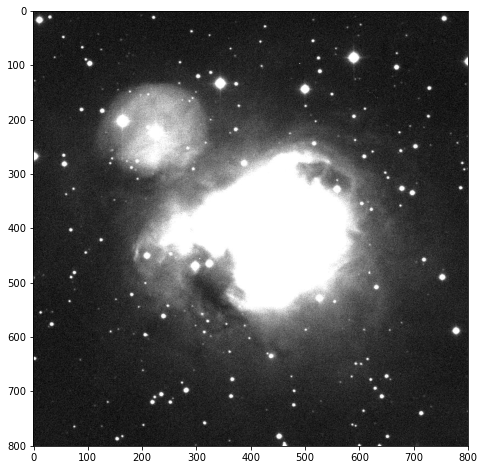

In [6]:
# En este punto ya tenemos una representación de la imagen que podemos usar para analizarla o procesarla con distintas técnicas.
# Para visualizar la imagen que acabamos de leer se pueden usar el paquete matplotlib.
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))

# Este comando es útil para que la visualización sea en blanco y negro.
plt.gray()

# Visualiza la imagen.
plt.imshow(im)


## Máscaras de imágenes.
#### Para analizar los resultados de una técnica de procesado se pueden emplear máscaras.
#### Una máscara de una imagen indica la salida deseada para cada píxel.
#### Para nuestro caso las máscaras son imágenes de las mismas dimensiones que la imagen original.
#### El valor de cada píxel de la máscara indica si es una zona de nebulosa.

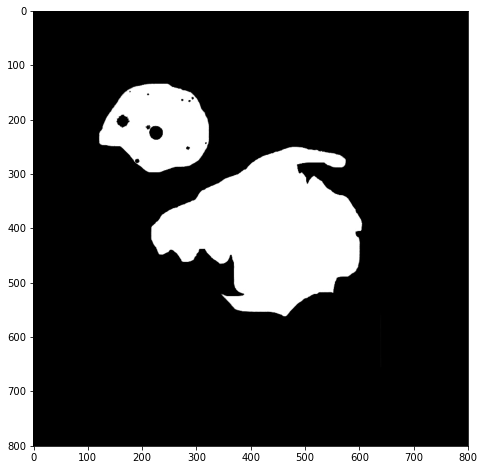

In [7]:
# Se puede leer la máscara y visualizarla, de forma similar a lo que se ha hecho previamente con la imagen original.

mask = imageio.imread('mask_stem1.jpg')

mask = mask[:,:,0]

plt.figure(figsize=(8,8))

plt.gray()

plt.imshow(mask)

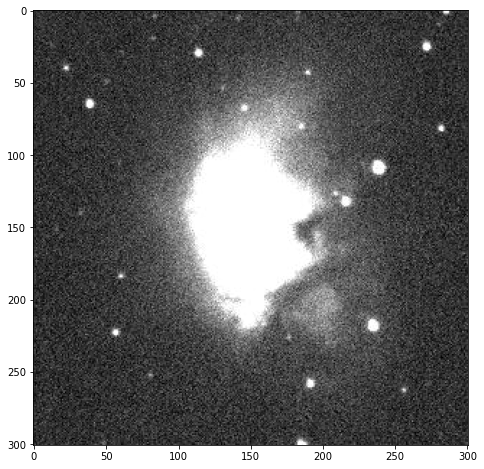

In [8]:
# Para las pruebas siguientes se utilizará la imagen stem1 mostrada anteriormente.
# Pero es interesante probar también con la imagen stem2 para ver cómo afecta a los resultados.

im2 = imageio.imread('stem2.jpg')

im2 = im2[:,:,0]

plt.figure(figsize=(8,8))

plt.gray()

plt.imshow(im2)

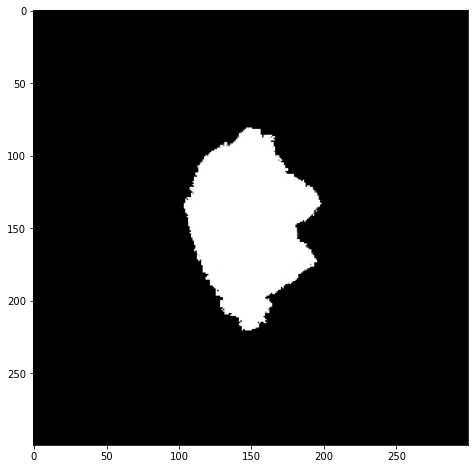

In [9]:
# Leemos la máscara correspondiente a la imagen stem2.
mask2 = imageio.imread('mask_stem2.jpg')

mask2 = mask2[:,:,0]

plt.figure(figsize=(8,8))

plt.gray()

plt.imshow(mask2)

# En las pruebas siguientes se usa la imagen stem1, como se indicó anteriormente.
# Por tanto no es necesario almacenar las variables de la imagen stem2 y su máscara.
# Al eliminarlas se usan menos recursos y además se evita que por error se usen variables de una imagen cuando realmente se pretende usar otra.
del im2, mask2


## Técnicas de agrupamiento de datos.
#### Las técnicas de agrupamiento (clustering) tratan de encontrar una partición de un conjunto de datos de forma que los elementos de un mismo grupo sean más similares que los elementos de grupos distintos. Esto permite resumir un conjunto de datos, y puede facilitar algunos procesos de visualización o análisis posteriores con otras técnicas.

## K-Means
#### Existen técnicas de agrupamiento muy diversas. Una de las más conocidas es la denominada k-means. Se trata de un algoritmo clásico y es interesante conocerlo ya que es muy utilizado y se ha empleado como base de muchos algoritmos más complejos.
#### Para aplicar el algoritmo se selecciona el número de grupos a utilizar y un prototipo (elemento representativo) de cada grupo. A continuación se realiza un proceso iterativo en el que se van asignando datos al grupo más próximo, se recalcula el prototipo de cada grupo, y se repite el proceso hasta que se estabiliza. 
#### El algoritmo es muy general y se puede aplicar también en otros contextos, además del procesado de imágenes. 
#### En este caso aplicaremos el algoritmo a los píxeles de imágenes de niveles de gris, por lo que el prototipo de cada grupo será el valor de un píxel. El número de grupos podemos establecerlo manualmente, realizando pruebas con distintos valores. Existen algoritmos más complejos que tratan de automatizar el proceso, pero es interesante familiarizarse inicialmente con las versiones más simples de los algoritmos, para centrar el estudio en los aspectos fundamentales.

In [10]:
# El paquete scikit-learn es útil para realizar diversos análisis de datos.
# Por ejemplo se puede usar para aplicar el algoritmo k-Means.
from sklearn.cluster import KMeans

# Convertimos la imagen en un array de valores.
im_array = im.reshape(im.shape[0] * im.shape[1], 1)

# Ejecutamos el algoritmo con 2 clusters. 
# El parámetro max_iter indica el número máximo de iteraciones. 
# El parámetro random_state es útil para que los resultados sean reproducibles.
# Este proceso puede tardar un poco dependiendo de los parámetros que se indiquen.
kmeans = KMeans(n_clusters=2, max_iter=10, random_state=0).fit(im_array)

In [11]:
# Podemos ver los prototipos de los grupos. Habrá un prototipo por cada grupo.
kmeans.cluster_centers_

array([[219.54897259],
       [ 44.04878067]])

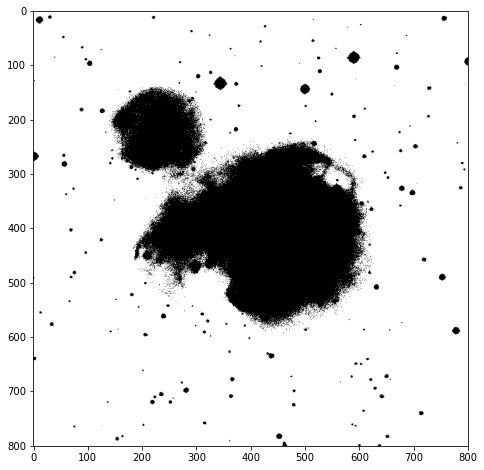

In [12]:
# Obtenemos la imagen segmentada aplicando el algoritmo a cada píxel de la imagen.
im_segm_array = kmeans.predict(im_array)

# Cambiamos las dimensiones de los datos segmentados para que se correspondan con la imagen inicial. 
im_segm = im_segm_array.reshape(im.shape[0], im.shape[1])

# Podemos visualizar la imagen segmentada.
plt.figure(figsize=(8,8))
plt.gray()
plt.imshow(im_segm)

In [13]:
# Al analizar visualmente los resultados se puede observar algunos efectos.
#
# Se puede apreciar que algunas zonas de nebulosas se han detectado correctamente como pertenecientes a un mismo grupo.
# En general las zonas del fondo se han asociado correctamente a un mismo grupo.
# Pero algunas zonas de nebulosas se han asignado al grupo del fondo. 
#
# Es interesante experimentar variando el número de grupos y haciendo pruebas con distintas imágenes para tratar de entender
# cómo afectan a la salida del algoritmo. También puede ser interesante variar la inicialización de los grupos 
# o hacer pruebas aplicando el algoritmo a una región más pequeña de la imagen.
#
# Si se prueba con varios grupos hay que tener en cuenta que la imagen segmentada es una división de los píxeles en grupos,
# pero no se puede asumir ninguna relación específica entre distintos grupos.
# Por ejemplo si se usan 3 grupos, es posible que los grupos 1 y 3 se correspondan con zonas más oscuras que el grupo 2. 
# Si se visualiza como una imagen puede parecer engañoso porque el color de cada grupo no reflejará nada especial,
# no se puede asumir por ejemplo que un color más claro o más oscuro se corresponde con zonas de fondo o de nebulosas.

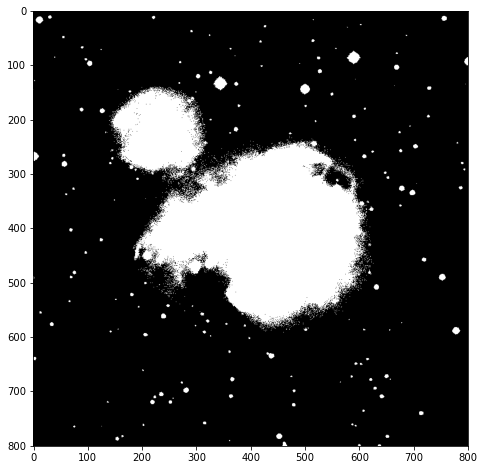

In [14]:
# Ordenamos los grupos en función del valor del representante. 
# Este proceso puede ser interesante para que la visualización sea más fácil de interpretar, sobre todo si hay bastantes grupos.
# No es necesario entender todos los detalles de este proceso, simplemente es un paso auxiliar en el proceso de los datos.
# Se puede seguir la lógica general del tutorial sin necesidad de analizar en detalle este paso.

indices_grupos = np.argsort(kmeans.cluster_centers_.flatten())

indice_nuevo = max(indices_grupos) + 1
for indice_original in indices_grupos:
    im_segm[im_segm == indice_original] = indice_nuevo
    indice_nuevo += 1 

# Podemos visualizar la imagen segmentada en blanco y negro.
plt.figure(figsize=(8,8))
plt.gray()
plt.imshow(im_segm) 

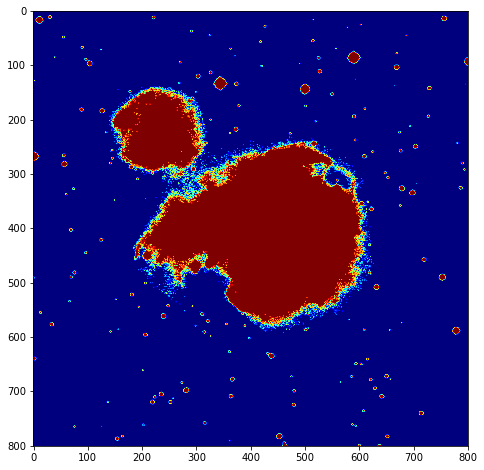

In [15]:
# También podemos visualizarla la imagen segmentada en color. 
# Se pueden utilizar distintos mapas de color. 
# Por ejemplo para aplicar el mapa jet de matplotlib se puede usar el siguiente comando.
plt.figure(figsize=(8,8))
plt.jet()
plt.imshow(im_segm) 

## FCM
#### El algoritmo Fuzzy C-Means (FCM) está basado en el K-Means.
#### A diferencia del K-Means, se consideran grados de pertenencia difusos.
#### Es decir, el grado de pertenencia a un cluster se representa con un valor real entre 0 y 1, en lugar de usar un valor binario (0 o 1).

In [16]:
# El paquete scikit-fuzzy es útil para realizar diversos análisis de lógica difusa.
# Por ejemplo se puede usar para aplicar el algoritmo FCM.
import skfuzzy as fuzz

# Aplicamos el algoritmo FCM.
# El parámetro data indica los datos a procesar. 
# Usamos la variable im_array que ya tiene los datos, pero se aplica el método reshape() para que el formato sea el esperado (cada columna representa un valor). 
# El parámetro c indica el número de clusters.
# El parámetro maxiter indica el número máximo de iteraciones. 
# El parámetro seed es útil para que los resultados sean reproducibles.
# Se puede consultar documentación específica en https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.cluster.html
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=im_array.reshape(1, len(im_array)), c=2, m=2, error=0.005, maxiter=10, seed=0)


In [17]:
# Podemos ver los prototipos de los grupos. Habrá un prototipo por cada grupo.
cntr

array([[ 40.97545082],
       [219.92266627]])

In [18]:
# Podemos ver los grados de pertenencia de un píxel a cada cluster.
# Por ejemplo las perenencias para los primeros 5 píxel se pueden ver con el siguiente comando.
# La variable u tiene una fila por cada cluster y una columna por cada píxel.
# El primer parámetro indica que seleccionamos todas las filas.
# El segundo parámetro indica que seleccionamos los 5 primeros píxeles (del 0 al 4).
u[:, 0:5]

array([[9.99970608e-01, 9.71853556e-01, 9.93875846e-01, 9.93327722e-01,
        9.91736492e-01],
       [2.93918033e-05, 2.81464441e-02, 6.12415396e-03, 6.67227772e-03,
        8.26350818e-03]])

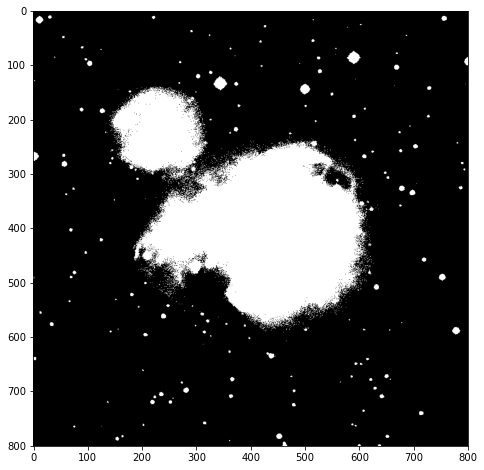

In [19]:
# Para visualizar la imagen segmentada aplicamos una serie de pasos. 
# Este proceso es similar al aplicado anteriormente para el k-Means, pero adaptado al formato de salida del FCM.

# En primer lugar asociamos a cada píxel el cluster para el que tiene una mayor pertenencia. 
clusters_array = np.argmax(u, axis=0)

# Cambiamos las dimensiones de los datos segmentados para que se correspondan con la imagen inicial.
im_segm = clusters_array.reshape(im.shape[0], im.shape[1])

# Podemos visualizar la imagen segmentada. Por ejemplo para mostrarla en color se pueden usar los siguientes comandos.
plt.figure(figsize=(8,8))
plt.gray()
plt.imshow(im_segm)

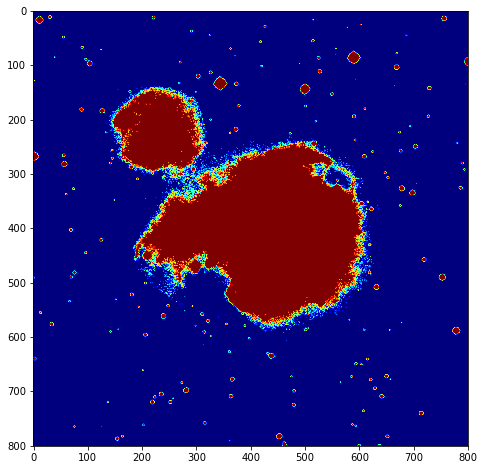

In [20]:
# Ordenamos los grupos en función del valor del representante, de forma similar a la realizada para el k-Means. 
# Este proceso puede ser interesante para que la visualización sea más fácil de interpretar, sobre todo si hay bastantes grupos.
# No es necesario entender todos los detalles de este proceso, simplemente es un paso auxiliar en el proceso de los datos.
# Se puede seguir la lógica general del tutorial sin necesidad de analizar en detalle este paso.

indices_grupos = np.argsort(cntr.flatten())

indice_nuevo = max(indices_grupos) + 1
for indice_original in indices_grupos:
    im_segm[im_segm == indice_original] = indice_nuevo
    indice_nuevo += 1 

# Podemos visualizar la imagen segmentada con la nueva numeración de clusters. Por ejemplo para mostrarla en color se pueden usar los siguientes comandos.
plt.figure(figsize=(8,8))
plt.jet()
plt.imshow(im_segm)

## Preprocesado.
#### En las etapas iniciales del procesamiento de imágenes (preprocesado) se puede considerar la aplicación de distintas técnicas para realizar modificaciones en las imágenes que faciliten su análisis.
#### Pueden ser útiles si las imágenes presentan algún ruido (valores no deseados de la imagen, que no indican ninguna característica real que interese medir).
#### En particular las imágenes de nebulosas presentan un fondo con puntos brillantes de pequeño tamaño que puede interesar eliminar para facilitar el proceso de segmentación de nebulosas.
#### Existen distintos tipos de filtros y cada filtro puede tener distintos parámetros.
#### Su utilidad dependerá del tipo de aplicación y del resto de técnicas empleadas, si se usan como parte de una secuencia de procesados.
#### No siempre es necesario aplicar un filtro, pero es interesante entender cómo funcionan y saber aplicarlos.
#### Se pueden considerar técnicas muy generales, aplicables en distintos contextos. 
#### Como se ha mencionado es habitual aplicarlos en las etapas de preprocesado, pero también se podrían aplicar en etapas intermedias del procesado.
#### Es importante tener en cuenta que al aplicar un filtro se puede distorsionar en parte la imagen, y puede afectar a píxeles que tienen un valor real (no afactado por el ruido), por lo que se deben ajustar los parámetros del filtro según el tipo de aplicación.

## Filtro gaussiano.
#### El filtro gaussiano puede ser útil para reducir el ruido en imágenes que tienen zonas con valores alejados de la media.
#### Al aplicar el filtro se genera una imagen de las mismas dimensiones que la original.
#### Cada píxel de la imagen de salida se obtiene como un promedio de los píxeles de una ventana centrada en el píxel (por ejemplo una región de 3x3 píxeles),
#### multiplicando el valor de cada píxel por el correspondiente píxel de una función gaussiana.
#### Si se considera una ventana muy amplia se puede degradar la resolución espacial, por lo que en general no interesa usar valores excesivamente altos.

In [21]:
# El paquete scipy es útil para realizar diversos procesados matemáticos de forma eficiente.
# Por ejemplo se puede usar para aplicar el filtro de mediana a una imagen.
from scipy import ndimage

# El parámetro sigma indica la desviación típica del kernel gaussiano.
# Es interesante probar distintos valores y estudiar cómo afecta a la imagen de salida.
# Es posible considerar regiones rectangulares con un tamaño distinto para las filas y columnas, 
# pero en la práctica lo más habitual es considerar regiones cuadradas, como en este ejemplo.
im_filt = ndimage.gaussian_filter(im, sigma=11)

# En este punto ya se tiene la imagen filtrada.
# Pero, como se mencionó anteriormente, algunos píxeles de la imagen de entrada no se corresponden con una señal real.
# Al aplicar el filtro es posible que algunos de esos píxeles se hayan modificado.
# Dependiendo de la aplicación puede no ser un problema, por ejemplo si el filtro se aplica para facilitar un análisis visual.  
# Pero para asegurar que sigan teniendo el valor 0 se puede aplicar el siguiente comando.
# También se podría ignorar esos píxeles al aplicar el filtro pero complicaría un poco el código, y en este caso no es necesario.
im_filt[im == 0] = 0

<Figure size 432x288 with 0 Axes>

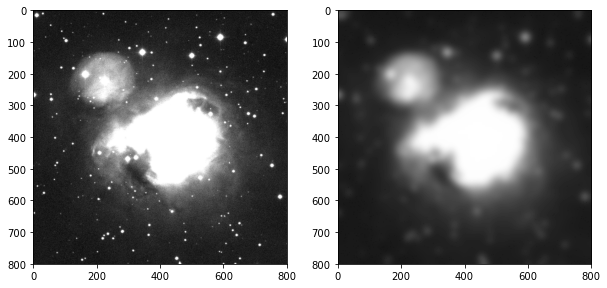

In [22]:
# Podemos visualizar la imagen filtrada.
from matplotlib import pyplot as plt

# Este comando es útil para que la visualización sea en blanco y negro.
plt.gray()

# Para facilitar la comparación entre la imagen original y la imagen filtrada podemos mostrar las dos imágenes.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

# Visualiza la imagen original.
ax1.imshow(im)

# Visualiza la imagen filtrada.
# Es interesante comparar el fondo de la imagen original y la imagen filtrada.
# En general un filtro no podra reducir todo el ruido sin distorsionar el resto de la imagen, por lo que se debe buscar un equilibrio 
# ajustando los parámetros del filtro. En este caso se puede probar con distintos valores del parámetro sigma del kernel gaussiano.
ax2.imshow(im_filt)

## Procesado morfológico.
#### Existen diversas técnicas de procesado morfológico de imágenes.
#### En general se basan en operaciones sobre conjuntos de elementos de la imagen.
#### Se pueden aplicar en diversas tareas de preprocesado o postprocesado de imágenes.
#### En este apartado se utilizarán técnicas de procesado morfológico para tratar de detectar las zonas brillantes de pequeño tamaño.
#### Esto puede ser útil para facilitar etapas posteriores de segmentación. Por ejemplo si se detectan de forma adecuada la mayoría de estas zonas, se podrían eliminar de la imagen y el algoritmo de segmentación podría funcionar mejor directamente, sin necesidad de hacer ningún ajuste especial.

In [23]:
import skimage.morphology
import scipy

# Definimos una imagen para representar las zonas brillantes de pequeño tamaño.
# Inicialmante podemos obtener una imagen a partir de la imagen filtrada anteriormente, 
# considerando los píxeles que sean más brillantes.
# En este caso se han considerado los píxeles de la imagen orginal que tengan un valor mayor que la imagen filtrada 
# más la desviación típica de los píxeles de la imagen.
# Puede ser interesante hacer pruebas con otros valores para ver cómo afecta al resultado.
im_zonas_claras_peq = im > (im_filt + np.std(im))

# Obtenemos la representación de un disco de radio 1.
# Puede ser interesante hacer pruebas con otros valores del radio del disco para ver cómo afecta al resultado.
selem = skimage.morphology.disk(radius = 1)

# Realizamos una operación de apertura binaria de la imagen empleando el disco obtenido anteriormente.
# Esta operación puede ser útil para distintas tareas de procesado de imágenes. 
# En este caso la usaremos para tratar de detectar zonas brillantes de pequeño tamaño.
# Se puede consultar información sobre esta operación en https://en.wikipedia.org/wiki/Opening_%28morphology%29 
im_zonas_claras_peq = scipy.ndimage.binary_opening(input=im_zonas_claras_peq, structure=selem)

<Figure size 432x288 with 0 Axes>

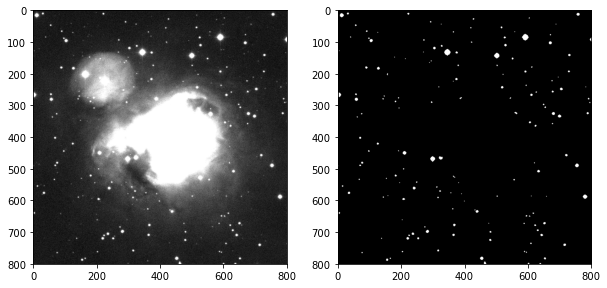

In [24]:
# Podemos visualizar la imagen preprocesada de zonas brillantes de pequeño tamaño.
from matplotlib import pyplot as plt

# Este comando es útil para que la visualización sea en blanco y negro.
plt.gray()

# Para facilitar la comparación entre la imagen original y la imagen filtrada podemos mostrar las dos imágenes.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

# Visualiza la imagen original.
ax1.imshow(im)

# Visualiza la imagen preprocesada de zonas brillantes de pequeño tamaño.
# Es interesante comprobar que se han detectado razonablemente bien los puntos brillantes de pequeño tamaño.
ax2.imshow(im_zonas_claras_peq)

<Figure size 432x288 with 0 Axes>

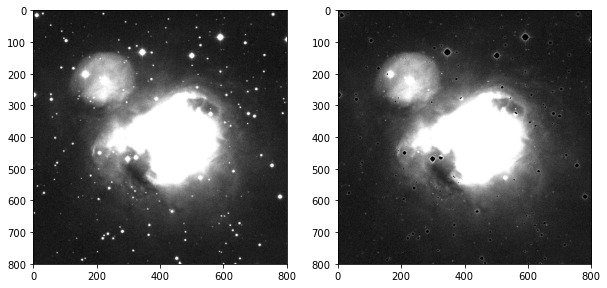

In [25]:
# Una vez detectadas las zonas brillantes de pequeño tamaño, se puede utilizar esta imagen para realizar procesos adicionales, 
# como eliminar esas zonas o realizar algún tipo de análisis específico.
# En este caso usaremos la imagen para eliminar dichas zonas de la imagen original.

im_preprocesada = np.copy(im)
im_preprocesada[im_zonas_claras_peq] = 0

# Este comando es útil para que la visualización sea en blanco y negro.
plt.gray()

# Para facilitar la comparación entre la imagen original y la imagen filtrada podemos mostrar las dos imágenes.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

# Visualiza la imagen original.
ax1.imshow(im)

# Visualiza la imagen preprocesada.
# Como se explicó anteriormente, al aplicar cualquier técnica de procesado pueden aparecer efectos no deseados en algunas regiones,
# por lo que es importante buscar un equilibrio que en general dependerá de la aplicación concreta.
# Puede ser interesante realizar pruebas con otra imagen y probar con distintos parámetros,.
# También puede ser instructivo probar las técnicas de segmentación explicadas anteriormente aplicándolas a la imagen preprocesada
# y comprobar cómo afecta a los resultados de la segmentación.
ax2.imshow(im_preprocesada)

## Evaluación de resultados.
#### Para evaluar el resultado de las técnicas de segmentación se pueden emplear distintas métricas.
#### En este tutorial se emplearán métricas de discrepancia empírica, que son muy utilizadas en diversos problemeas de procesado de imágenes. Estas métricas permiten obtener valores numéricos comparando una imagen segmentada con una imagen de referencia denominada máscara. Estos valores numéricos se pueden utilizar para comparar los resultados de distintas técnicas o de una misma técnica ejecutada con distintos parámetros.
#### La elección de las métricas puede depender del problema concreto, pero en general es interesante calcular varias, ya que la segmentación es un proceso complejo y puede ser difícil resumir el resultado con una única métrica.
#### En nuestro caso las máscaras son binarias. Es decir, se distingue entre dos valores que representan las zonas de fondo y las de nebulosas.
#### Para comparar la salida de un algoritmo de segmentación es necesario tenerlo en cuenta, para obtener una representación comparable.
#### Por ejemplo, en el caso de algoritmos de agrupamiento, si el número de grupos es mayor que 2 no habrá una correspondencia directa con los valores de las máscaras. 
#### Incluso aunque solo se usen dos grupos, podría suceder que las etiquetas asignadas a cada grupo no coincidan con las etiquetas usadas en las máscaras. Esto se debe a que en general las técnicas de agrupamiento o clustering tratan de dividir la imagen en regiones homogéneas, pero sin asumir ningún significado específico para cada región.
#### Es posible usar distintas técnicas para realizar la evaluación. Por ejemplo, en este caso se puede seleccionar el cluster o clusters con valores medios más altos y considerar que se corresponden con las zonas de nebulosas.
#### A continuación se muestra un ejemplo para ilustrar el proceso de evaluación de resultados.
#### Es interesante realizar pruebas utilizando otra imagen, o variando algún parámetro en las técnicas de agrupamiento, para ver cómo afecta a los resultados. También es interesante comprobar si los resultados numéricos de la métrica que se esté analizando se corresponden con la interpretación visual que podamos hacer de la segmentación.

<Figure size 432x288 with 0 Axes>

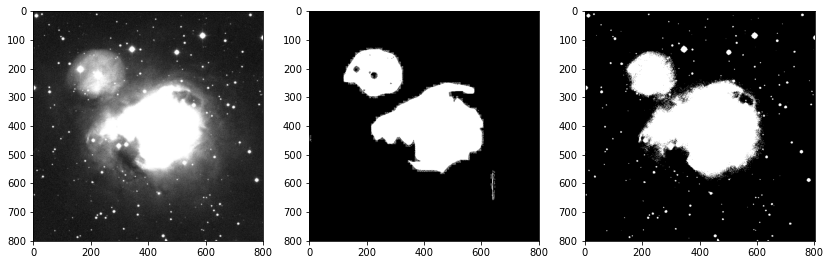

In [26]:
# Obtenemos una imagen binaria a partir de la imagen segmentada.
# En este ejemplo se considera que los elementos de la imagen segmentada con valor mayor representan zonas de nebulosas.
# Dependiendo de la técnica de segmentación, de los parámetros usados y de las técnicas de preprocesado aplicadas, 
# es posible que los valores numéricos concretos de la imagen segmentada sean distintos.
# En ese caso simplemente habría que seleccionar los valores de la imagen segmentada que se desee evaluar.
# En este ejemplo, el valor np.max(im_segm) representa el valor mayor de la imagen segmentada.
im_segm_binaria = (im_segm == np.max(im_segm)).astype(int)

# Para que la comparación de valores de la imagen binaria y la máscara se pueda realizar directamente
# hacemos que el valor máximo de la máscara sea el mismo que el de la imagen segmentada binaria.
# El valor mínimo en este caso es 0 en ambos casos por lo que no hay que tratarlo de forma especial.
# Este paso es necesario porque las máscaras tienen valores 0 y 255 en este caso.
# En general las métricas asumen que hay una correspondencia entre los valores de la segmentación y de la máscara, por lo que debemos tenerlo en cuenta.
mask = (mask > 0).astype(int)

# Este comando es útil para que la visualización sea en blanco y negro.
plt.gray()

# Para facilitar la comparación entre la imagen original y la imagen filtrada podemos mostrar las dos imágenes.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,14))

# Visualiza la imagen.
ax1.imshow(im)

# Visualiza la máscara.
ax2.imshow(mask)

# Visualiza la imagen segmentada binaria.
ax3.imshow(im_segm_binaria)

In [27]:
# El paquete metrics de sklearn es útil para calcular distintas métricas de evaluación.
# Es interesante consultar la documentación del paquete (https://scikit-learn.org/stable/modules/model_evaluation.html).
from sklearn import metrics

# La métrica accuracy indica la proporción de píxeles segmentados correctamente, según la máscara.
print(metrics.accuracy_score((mask > 0).astype(int).flatten(), im_segm_binaria.flatten()))

0.9497070609303914


In [75]:
# Las matrices de confusión también son muy utilizadas para evaluar el resultado de algoritmos de segmentación.
conf_matrix = metrics.confusion_matrix((mask > 0).flatten(), im_segm_binaria.flatten())

print('Verdaderos negativos (TN):', conf_matrix[0, 0])

print('Falsos positivos (FP):', conf_matrix[0, 1])

print('Falsos negativos (FN):', conf_matrix[1, 0])

print('Verdaderos positivos (TP):', conf_matrix[1, 1])

Verdaderos negativos (TN): 517667
Falsos positivos (FP): 23397
Falsos negativos (FN): 8871
Verdaderos positivos (TP): 91666


## Aprendizaje profundo.
#### Los sistemas de aprendizaje profundo (deep learning) asumen que los datos son generados mediante la composición de factores y tratan de construir de forma automática una jerarquía de representaciones.
#### La profundidad de un sistema de aprendizaje indica el número de niveles. Si es suficientemente alto se considera un sistema de aprendizaje profundo. No hay un valor exacto para definirlo, puede depender de la aplicación concreta o de los autores, pero en cualquier caso son sistemas con varios niveles.
#### El concepto de aprendizaje profundo es muy general y puede aplicarse a distintas técnicas, en particular a las redes neuronales.
#### Estas técnicas han experimentado un desarrollo importante en los últimos años y se han aplicado con éxito en distintos campos, por ejemplo en tareas de procesado de imágenes.

## Redes neuronales artificiales.
#### Las redes neuronales son modelos de aprendizaje que incluyen varios elementos de procesado interconectados.
#### Algunas ideas o arquitecturas de procesado están inspirados en parte en la organización de neuronas biológicas.
#### Pero en general las aplicaciones de redes neuronales artificales no necesariamente tratan de replicar de forma precisa un mecanismo biológico.
#### Por ejemplo es posible realizar modificaciones en las arquitecturas de las redes neuronales artificiales para tratar de resolver un problema concreto, aunque dicho problema no tenga una representación biológica conocida.
#### Las redes neuronales son sistemas muy fexibles y pueden presentar problemas de sobreentrenamiento.
#### El sobreentrenamiento está relacionado con un ajuste excesivo a los datos concretos de entrenamiento, incluidas variaciones aleatorias no extrapolables a nuevos datos.
#### Se pueden aplicar diversas técnicas de regularización para tratar de reducir este problema y mejorar la capacidad de generalización ante nuevos datos no usados en el proceso de entrenamiento.
#### El proceso de regularización se puede interpretar como un mecanismo similar al olvido gradual que ocurre en sistemas bioógicos, en el que se eliminan los patrones menos relevantes que podrían considerarse como ruido.
#### Existen distintos tipos de redes neuronales, por ejemplo las redes neuronales convolucionales y los autocodificadores.

## Redes neuronales convolucionales.
#### Las redes neuronales convolucionales se pueden aplicar directamente a los datos crudos de entrada, que en el caso que estamos tratando serían los píxeles de la imagen a procesar.
#### Esto constituye una ventaja importante con respecto a otras técnicas que necesitan una representación más elaborada de los datos de entrada. En algunos campos es posible procesar específicamente los datos para usar alguna representación conocida, pero suele ser un proceso costoso en tiempo y no siempre está claro qué representaciones son las más adecuadas para un determinado problema.
#### Otra ventaja de las redes neuronales convolucionales es la reducción en el número de parámetros necesarios, en comparación con otras redes neuronales tradicionales en las que cada elemento de una capa está conectado con todos los elementos de la capa siguiente. 
#### Las redes neuronales convolucionales aprovechan las relaciones espaciales entre píxeles próximos, utilizando operaciones de convolución que se aplican con los mismos pesos en cada región de la imagen. 
#### Se puede ver información y ejemplos de operaciones de convolución por ejemplo en https://training.galaxyproject.org/training-material/topics/statistics/tutorials/CNN/slides-plain.html, como la siguiente imagen que ilustra un paso de una convolución. En el ejemplo se aplica un filtro convolucional de 3x3 elementos a una región de la entrada del mismo tamaño. La zona resaltada de la imagen de entrada se multiplica por el elemento correspondiente del filtro, y finalmente se suman los valores para obtener el dato de salida correspondiente. Esta operación se repetiría para otras regiones de la imagen de entrada. En general puede haber varios filtros y varios elementos de entrada pero la idea general es similar a la indicada.

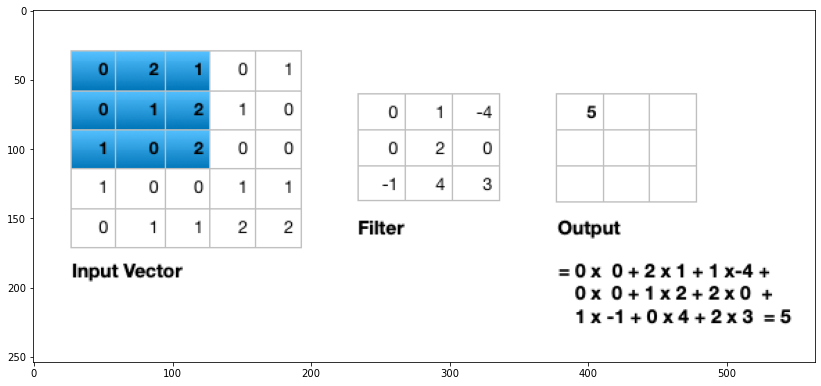

In [29]:
# Esta se ha obtenido de https://training.galaxyproject.org/training-material/topics/statistics/tutorials/CNN/slides-plain.html,
# Se puede consultar dicha web para ver más ejemplos de convoluciones.
im_convnet = imageio.imread('convolution.png')

plt.figure(figsize=(14,14))

plt.imshow(im_convnet)

## Autocodificadores.
#### Los autocodificadores (autoencoders) son redes neuronales que se pueden aplicar a diversas tareas de aprendizaje no supervisado.
#### La capa de entrada y la capa de salida de un autocodificador tienen las mismas dimensiones.
#### Los autocodificadores tratan de replicar la entrada en la capa de salida.
#### Si se aplica directamente no tendría utilidad porque no se obtiene nada nuevo, pero la idea es usar alguna capa intermedia con restricciones que impidan que los datos se copien directamente a la salida.
#### De esta forma es posible obtener representaciones de los datos de entrada (en las capas intermedias) que tengan alguna característica de interés para una aplicación. Por ejemplo si las capas intermedias tienen menos elementos que las capas de entrada y salida se puede obtener una representación más compacta de los datos. Esta representación se podría utilizar por ejemplo para entrenar una técnica de clasificación supervisada o para buscar imágenes similares en una base de datos.
#### Debido a las restricciones aplicadas, en general no será posible obtener una salidad exactactamente igual a la entrada.
#### En dominios en los que hay muchos datos no etiquetados puede ser interesante aplicar técnicas de este tipo porque pueden obtener representaciones de los datos sin necesidad de realizar un preprocesado manual previo de todos los datos.

## Autocodificadores convolucionales.
#### Los autocodificadores convolucionales tienen una arquitectura similar a la de otros autocodificadores, pero incluyen capas convolucionales.
#### Pueden ser interesantes en problemas de procesado de imágenes, por ejemplo para filtrado de ruido o para obtener representaciones compactas de una imagen.
#### En estos sistemas el codificador es una red neuronal convolucional, que suele reducir las dimensiones de la imagen al ir pasando por las capas de la red.
#### El descodificador es una red similar pero que aplica procesos inversos, aumentando las dimensiones de la imagen para que la salida tenga las mismas dimensiones que la entrada.
#### En un apartado posterior se incluye un ejemplo de una red de este tipo.
#### Es interesante conocerla porque es relativamente simple realizar pruebas y modificaciones para ver cómo afectan al resultado.
#### A diferencia de otras redes no es necesario utilizar máscaras para el proceso de entrenamiento o ajuste de parámetros, por lo que el código es más simple.
#### Una ventaja al estudiar esta red es que se pueden ilustrar conceptos generales aplicables a otros autocodificadores (no convolucionales) y a redes convolucionales generales (no autocodificadores).

## Inicialización del entorno de programación para redes neuronales.
#### TensorFlow es una plataforma que permite realizar distintas operaciones matemáticas de forma eficiente. 
#### En particular gestiona el cálculo del gradiente de expresiones diferenciables de forma automática. 
#### No es necesario conocer los detalles técnicos del cálculo del gradiente para seguir los ejemplos de este tutorial, es suficiente saber que se utiliza en el proceso de ajuste de parámetros de distintos sistemas de aprendizaje automático. Indica qué ajustes realizar en los parámetros del sistema para reducir el error para un patrón de entrada concreto o un grupo de patrones (que en este caso serían imágenes).
#### Keras es una plataforma de aprendizaje profundo que utiliza TensorFlow.
#### Es posible utilizar directamente TensorFlow (sin utilizar Keras) para desarrollar sistemas de aprendizaje profundo, pero es interesante utilizar Keras porque simplifica el proceso. Keras abstrae distintos detalles de bajo nivel de TensorFlow y en general permite definir redes neuronales utilizando un código más sencillo que el que sería necesario si se usa directamente TensorFlow.
#### Como paso previo a la realización de pruebas de redes neuronales es importante comprobar que está disponible la plataforma TensorFlow, como se indica a continuación.

In [30]:
# Cargamos el paquete keras de tensorflow.
# Si tensorflow no está disponible en el notebook es posible que se produzca un error 
#     "ModuleNotFoundError: No module named 'tensforflow"
# En ese caso se puede ejecutar el siguiente comando (solo hay que ejecutarlo si no está disponible tensorflow, por eso se indica entre comentarios): 
#     !pip install tensorflow
# El proceso de instalación de tensorflow puede tardar un tiempo. Una vez instalado ya debe funcionar el comando para importar keras.
from tensorflow import keras

## Ejemplo de aplicación de un autocodificador convolucional para la eliminación de ruido.
#### Una aplicación de los autocodificadores es la eliminación de ruido en los datos de entrada.
#### En este ejemplo se ilustra el uso de un autocodificador convolucional para tratar de reducir el ruido en imágenes.
#### Para conseguir que el codificador ignore el ruido (variaciones no deseadas) en los datos de entrada se puede utilizar la técnica Dropout.
#### Esta técnica consiste en la eliminación de neuronas aleatoriamente durante el proceso entrenamiento para evitar una coadaptación excesiva.
#### Este código está basado en parte en ejemplos del libro "Aprende Machine Learning con Scikit-Learn, Keras y TensorFlow", segunda edición, Aurélien Géron.
#### El libro incluye ejemplos de más tipos de autocodificadores, así como otros tipos de redes neuronales y sistemas de aprendizaje automático.
#### También se ha consultado el libro "Deep Learning with Python", segunda edición, Francois Chollet, que trata sistemas de aprendizaje profundo con Keras.
#### Para explicaciones de la teoría de las redes neuronales es interesantes el libro "Neural Networks and Deep Learning: A Textbook", Aggarwal.
#### También es interesante el libro https://www.deeplearningbook.org/.
#### Además existen muchos artículos en internet con información relacionada.
#### Para seguir este tutorial no es necesario consultarlos, pero pueden ser interesantes si se quiere ampliar información en algún momento.
#### Los detalles de los modelos, capas y parámetros de Keras se pueden consultar en https://keras.io/.

In [31]:
# Realizaremos un procesado de la imagen por bloques, que deberán tener las dimensiones correspondientes a las de la entrada del autocodificador.
# Al procesar bloques de tamaño relativamente pequeño se podría aplicar fácilmente el autocodificador a imágenes de distintos tamaños,
# simplemente habría que dividir las imágenes grandes en bloques del tamaño considerado.
#
# La idea del modelo de autoencoder utilizado en este ejemplo sería detectar patrones o texturas en distintas regiones de la imagen que permitan reducir el ruido.
#
# Para otras aplicaciones de procesado de imágenes podría ser interesante considerar imágenes completas, por ejemplo si se pretende asignar una única 
# etiqueta identificativa a la imagen. En ese caso se podría perder información si se divide la imagen en bloques.
#
# En general el diseño del modelo dependerá de la aplicación concreta que se está desarrollando.
#
# En resumen, para el ejemplo que trataremos se puede dividir la imagen en bloques de tamaño fijo, que debe coincidir con el indicado para la entrada de la red.
# Además este proceso es interesante para ver cómo sería una etapa de entrenamiento con muchos datos.
# En este caso son bloques de una misma imagen pero la idea es similar al caso general de muchas imágenes. 
# De esta forma es posible realizar pruebas de forma más rápida experimentando con distintos parámetros y configuraciones de la red.
#
# Al procesarlo por bloques también se pueden descartar fácilmente las zonas que no tienen datos. 


# Procesamos bloques cuadrados de block_size x block_size píxeles.
block_size = 128

# Definimos el codificador convolucional.
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape(target_shape=[block_size, block_size, 1], input_shape=[block_size, block_size]),
    keras.layers.Dropout(rate=0.1),
    keras.layers.Conv2D(filters=4, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=4, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),    
    keras.layers.Conv2D(filters=4, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=4, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)     
])

# Definimos el descodificador convolucional.
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(filters=4, kernel_size=5, strides=2, padding="same", activation="relu", input_shape=[int(block_size/2**4), int(block_size/2**4), 4]), 
    keras.layers.Conv2DTranspose(filters=4, kernel_size=5, strides=2, padding="same", activation="relu"),    
    keras.layers.Conv2DTranspose(filters=4, kernel_size=5, strides=2, padding="same", activation="relu"),
    keras.layers.Conv2DTranspose(filters=1, kernel_size=5, strides=2, padding="same", activation="sigmoid"),
    keras.layers.Reshape(target_shape=[block_size, block_size])    
])

# Definimos el autocodificador convolucional, que incluye la parte del codificador y el descodificador.
conv_autoencoder = keras.models.Sequential([conv_encoder, conv_decoder])

# Preparamos el autoencoder para poder realizar posteriormente el proceso de entrenamiento.
conv_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [32]:
# Leemos la imagen que se usará para entrenar el autocodificador. 
# Es interesante realizar pruebas con otras imágenes.
#
# Si se dispone de un conjunto de entrenamiento se podrían usar varias imágenes para realizar el ajuste de los parámetros del autocodificador.
# El proceso es similar al indicado en este ejemplo, pero el código sería un poco más complejo y el proceso de entremamiento podría ser más lento 
# y necesitar más recursos.
# Para esos casos es interesante la utilización de GPUs (Graphical Processing Units) o TPUs (Tensorflow Processing Units), 
# que permiten acelerar algunos cálculos matemáticos usados internamente por las redes neuronales.
# El entorno de programación con keras facilita estas optimizaciones.
# Para este tutorial no es necesario, pero es interesante conocer esta posibilidad porque en algunos casos puede suponer una mejora considerable. 

# Para leer una imagen almacenada en un fichero se puede usar el paquete imageio.
import imageio

im = imageio.imread('stem1.jpg')

# En general las imágenes pueden representarse con más de 2 dimensiones, para representar distintos colores.
# En este caso trabajamos con imágenes de niveles de gris, por lo que solo necesitamos dos dimensiones.
# De esta forma se simplifica el procesado posterior y se usa menos memoria.
# En este caso no sería un problema importante porque no es una imagen excesivamente grande, pero en general conviene no usar más recursos de los necesarios.
im = im[:,:,0]

In [33]:
# Obtenemos los bloques de la imagen que se usarán para el proceso de entrenamiento o ajuste de parámetros.

im_blocks = np.array([], float)

block_start_increment = int(block_size * 0.75)

for tmp_start_row in range(0, im.shape[0], block_start_increment):

    for tmp_start_col in range(0, im.shape[1], block_start_increment):
        
        end_row = min(tmp_start_row + block_size, im.shape[0])
        end_col = min(tmp_start_col + block_size, im.shape[1])
        
        start_row = end_row - block_size
        start_col = end_col - block_size   
        
        if (start_row < 0):
            start_row = 0
            end_row = im.shape[0]
            
        if (start_col < 0):
            start_col = 0
            end_col = im.shape[1]            
        
        current_im_block = np.zeros([block_size, block_size], float)
        
        # Escalamos los valores para que los datos de entrada se correspondan con el formato de salida del autocodificador.
        # La salida del autocodificador es un valor entre 0 y 1.        
        current_im_block[0:end_row - start_row, 0:end_col - start_col] = np.array(im[start_row:end_row, start_col:end_col], float) / 255
        
        # Si el bloque actual no tiene ningún píxel con datos reales no lo usamos para el entrenamiento.
        # Se podría usar para entrenar pero podría afectar en parte a lo que aprende la red y posiblemente distorsionaría el modelo interno del espacio de entrada.
        # También se podría descartar cualquier bloque que tenga algún píxel sin datos reales, pero se estarían desaprovechando datos reales para el entrenamiento.
        # Para este ejemplo se usan todos los bloques salvo los que no tengan ningún dato, pero se pueden realizar pruebas 
        # cambiando este paso para comprobar si afecta a los resultados de la red.
        if np.max(current_im_block) == 0:
            continue        

        if np.size(im_blocks) == 0:
            im_blocks = np.array([current_im_block], float)
        else:
            im_blocks = np.vstack((im_blocks, [current_im_block]))  

In [ ]:
# Realizamos el proceso de entrenamiento con los bloques de la imagen obtenidos en el paso anterior.
history = conv_autoencoder.fit(x=im_blocks, y=im_blocks, epochs=200)

In [35]:
def apply_conv_autoencoder(conv_autoencoder, im, block_size):

    im_output = np.zeros(im.shape, int)

    # Al procesar la imagen por bloques es posible que en la salida se produzcan algunos efectos en los límites entre bloques adyacentes.
    # Pueden aparecer zonas en la imagen de salida con valores bastante distintos a los de los píxeles próximos.
    # Para evitar este problema podemos hacer que los bloques estén solapados y al generar la imagen de salida 
    # descartamos los píxeles de los bordes de cada bloque. 
    # Dichos píxeles se pueden averiguar a partir de la salida del bloque solapado que esté centrado en esos píxeles.
    min_distance_to_block_borders = 3
    block_start_increment = int(block_size * 0.5) + 1


    for tmp_start_row in range(0, im.shape[0], block_start_increment):

        for tmp_start_col in range(0, im.shape[1], block_start_increment):
        
            end_row = min(tmp_start_row + block_size, im.shape[0])
            end_col = min(tmp_start_col + block_size, im.shape[1])
        
            start_row = end_row - block_size
            start_col = end_col - block_size   
        
            if (start_row < 0):
                start_row = 0
                end_row = im.shape[0]
            
            if (start_col < 0):
                start_col = 0
                end_col = im.shape[1]            
      
            current_im_block = np.zeros([block_size, block_size], float)
          
            # Escalamos los valores para que los datos de entrada se correspondan con el formato de salida del autocodificador.
            # La salida del autocodificador es un valor entre 0 y 1.        
            current_im_block[0:end_row - start_row, 0:end_col - start_col] = np.array(im[start_row:end_row, start_col:end_col], float) / 255
        
            current_im_block = np.array([current_im_block], float)
        
            current_im_block_output = np.array(conv_autoencoder.predict(current_im_block, verbose=False) * 255, int)

            if min_distance_to_block_borders > 0:
                current_im_block_output[0, 0:min_distance_to_block_borders, :] = 0
                current_im_block_output[0, -min_distance_to_block_borders:, :] = 0
                current_im_block_output[0, :, 0:min_distance_to_block_borders] = 0
                current_im_block_output[0, :, -min_distance_to_block_borders:] = 0
                        
            im_output[start_row:end_row, start_col:end_col] = np.fmax(im_output[start_row:end_row, start_col:end_col], current_im_block_output[0,0:end_row - start_row, 0:end_col - start_col])
            
            
    # En este punto ya se tiene la imagen de salida.
    # Pero, como se mencionó anteriormente, algunos píxeles de la imagen de entrada pueden no corresponderse con un valor real.
    # Al aplicar la red es posible que algunos de esos píxeles se hayan modificado.
    # Dependiendo de la aplicación puede no ser un problema, por ejemplo si el filtro se aplica para facilitar un análisis visual.  
    # Pero para asegurar que sigan teniendo el valor 0 se puede aplicar el siguiente comando.
    im_output[im == 0] = 0     
    
    return im_output
                    

## Resultados del autocodificador convolucional.
#### Es interesante comparar la salida del autocodificador con la imagen de entrada.
#### Dependiendo de los datos de entrada, y la configuración de la red neuronal (por ejemplo el número de capas) los datos de salida pueden ser más o menos similares a la imagen de entrada.
#### La reconstrucción no es exacta, pero se puede apreciar que se mantienen las estructuras principales.
#### Obtener una reconstrucción exacta no tendría utilidad, porque en ese caso ya se podría usar directamente la imagen original.
#### El autocodificador internamente representa la imagen de una forma más compacta, lo que puede resultar útil para distintas aplicaciones, como la reducción de ruido o para permitir que las características de interés resulten más fácilmemente separables del entorno.
#### Por ejemplo, en este caso se podría ver que la zona de nebulosas es más compacta. Esto podría ser útil si se aplica algún proceso posterior para extraer la región correspondiente, por ejemplo aplicando técnicas de procesado morfológico como las estudiadas anteriormente.
#### También se puede observar que muchas de las zonas brillantes de pequeño tamaño (que no interesa segmentar en este caso) se han eliminado en la imagen de salida, aunque no se haya aplicado ningún preprocesado específico en la imagen de entrada. 
#### Es interesante realizar pruebas aplicando la red a una imagen preprocesada (como en ejemplos anteriores) para eliminar las zonas brillantes de pequeño tamaño, probar con otra imagen, variar algún parámetro de la red, el número de pasos (epochs) del entrenamiento, etc, y observar cómo afecta a la salida.

In [66]:
from matplotlib import pyplot as plt
import skimage.morphology
import scipy

# Procesa una imagen con un autocodificador.
# Devuelve la imagen original, la salida del autocodificador, la salida tras aplicar un umbral, y la imagen binaria final.
def process_im_with_autoencoder(im_name, conv_autoencoder, block_size):
    
    im = imageio.imread(im_name)

    # En general las imágenes pueden representarse con más de 2 dimensiones, para representar distintos colores.
    # En este caso trabajamos con imágenes de niveles de gris, por lo que solo necesitamos dos dimensiones.
    # De esta forma se simplifica el procesado posterior y se usa menos memoria.
    # En este caso no sería un problema importante porque no es una imagen excesivamente grande, pero en general conviene no usar más recursos de los necesarios.
    im = im[:,:,0]

    # Aplica el autoencoder a la imagen para obtener la imagen segmentada.
    autoencoder_output = apply_conv_autoencoder(conv_autoencoder, im, block_size)
    
    # Obtenemos una imagen binaria a partir de la salida de la red neuronal, seleccionando los píxeles con un valor de salida más alto.
    # Es interesante realizar pruebas con otros valores para el umbral.
    threshold = np.percentile(autoencoder_output, 90) 
    im_threshold = (autoencoder_output >= threshold).astype(int)
    
    # Podemos aplicar técnicas de procesado morfológico como las explicadas en apartados anteriores,
    # para tratar de reducir algunos efectos no deseados en la salida, como regiones pequeñas no conectadas al resto.
    # En caso de utilizar muchas más imágenes para entrenar la red, esto podría no ser necesario, 
    # pero en cualquier caso es interesante conocer la posibilidad de aplicar estas técnicas también en la parte final del procesado de imágenes.
    # En este caso obtenemos la representación de un disco para aplicarlo en una operación de procesado morfológico.
    # Puede ser interesante hacer pruebas con otros valores del radio del disco para ver cómo afecta al resultado.
    # Es interesante realizar pruebas con distintas operaciones de procesado morfológico y con distintos parámetros.
    # Este paso tiene por qué ser estrictamente necesario, se pueden realizar pruebas y seleccionar la opción que consideréis más adecuada.
    # En general puede depender del resto de opciones y parámetros que se hayan aplicado previamente.
    selem = skimage.morphology.disk(radius = 3)
    im_segm_binaria = scipy.ndimage.binary_opening(input=im_threshold, structure=selem).astype(int)
    
    return im, autoencoder_output, im_threshold, im_segm_binaria


# Visualiza el resultado obtenido al aplicar el autocodificador a una imagen.
def show_conv_autoencoder_output(im_name, conv_autoencoder, block_size, show_intermediate_steps=False):

    im, autoencoder_output, im_threshold, im_segm_binaria = process_im_with_autoencoder(im_name, conv_autoencoder, block_size)
    
    # Este comando es útil para que la visualización sea en blanco y negro.
    plt.gray()

    if show_intermediate_steps:
        # Para facilitar la comparación entre la imagen original y la imagen filtrada podemos mostrar las dos imágenes.
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18,18))
        
        # Visualiza la imagen.
        ax1.imshow(im)

        # Visualiza la imagen de salida de la red neuronal.
        ax2.imshow(autoencoder_output)
        del autoencoder_output
    
        ax3.imshow(im_threshold)
        del im_threshold

        ax4.imshow(im_segm_binaria)
        del im_segm_binaria
    
    else:
        # Para facilitar la comparación entre la imagen original y la imagen filtrada podemos mostrar las dos imágenes.
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,14))            

        # Visualiza la imagen.
        ax1.imshow(im)   
        del im

        ax2.imshow(im_segm_binaria)
        del im_segm_binaria

<Figure size 432x288 with 0 Axes>

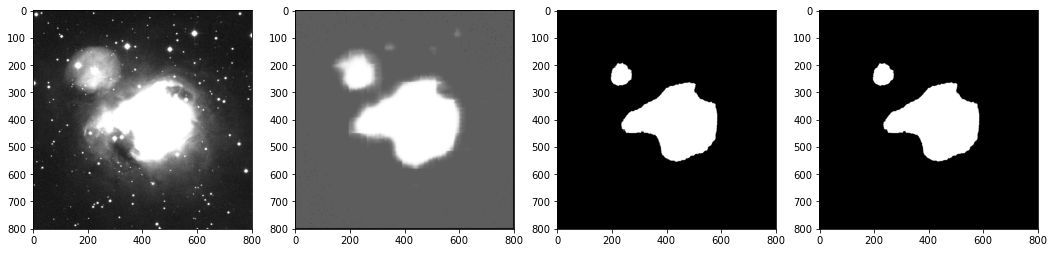

In [67]:
# Mostramos la salida del autocodificador convolucional entrenado anteriormente.
# Si se entrena con otra imagen, el resultado puede ser distinto.
# Es interesante realizar pruebas entrenándolo con distintas imágenes y ver cómo afecta al resultado.
show_conv_autoencoder_output('stem1.jpg', conv_autoencoder, block_size, show_intermediate_steps=True)

<Figure size 432x288 with 0 Axes>

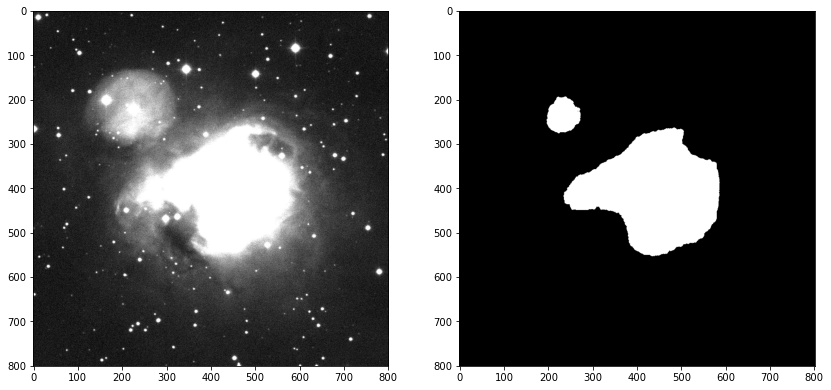

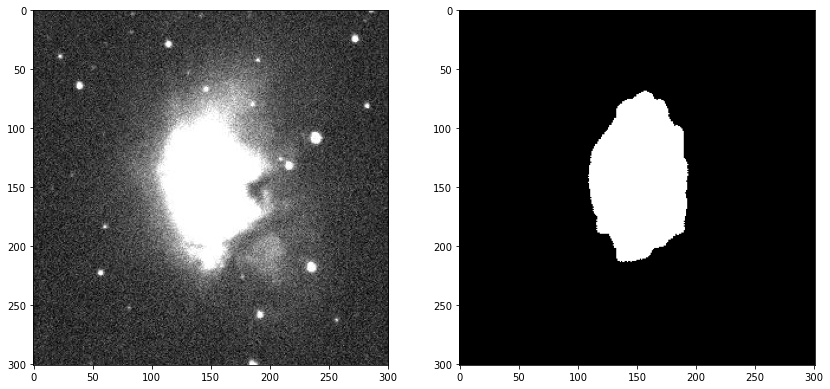

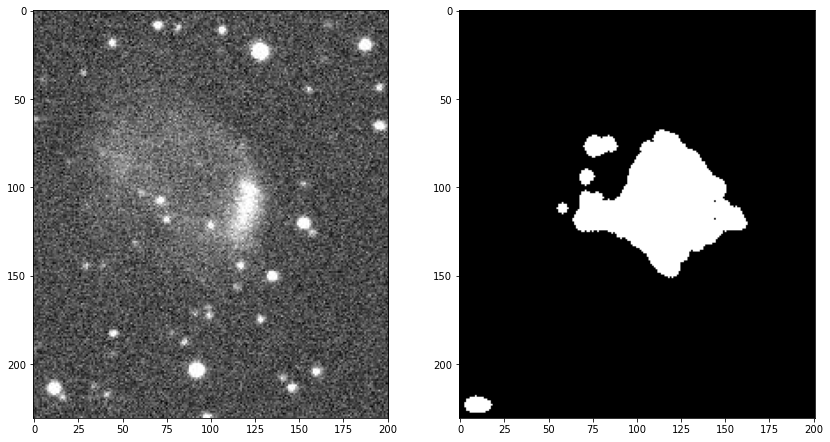

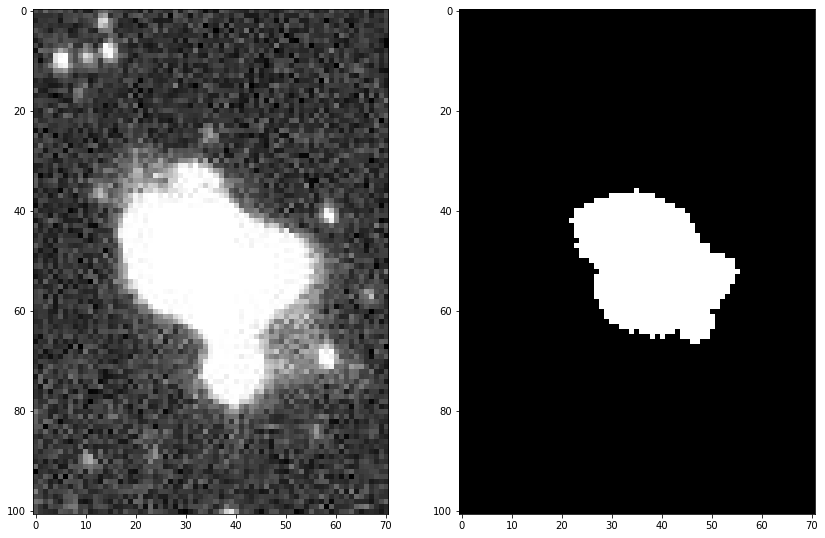

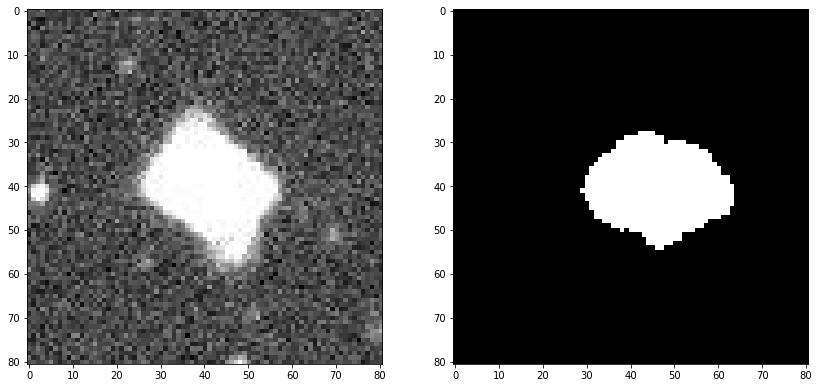

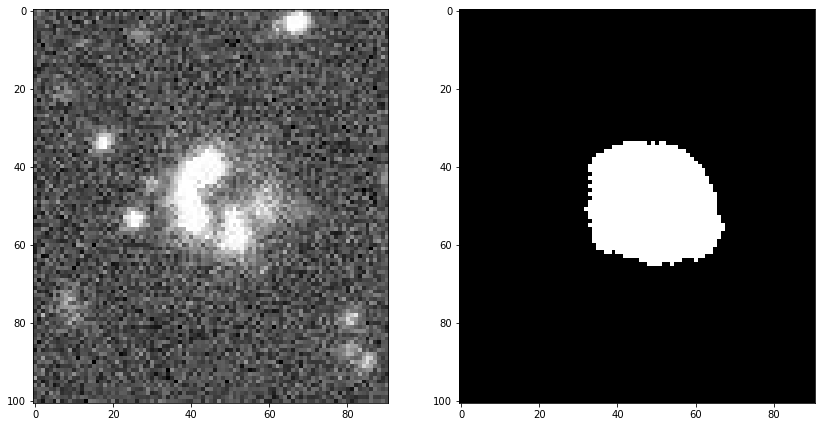

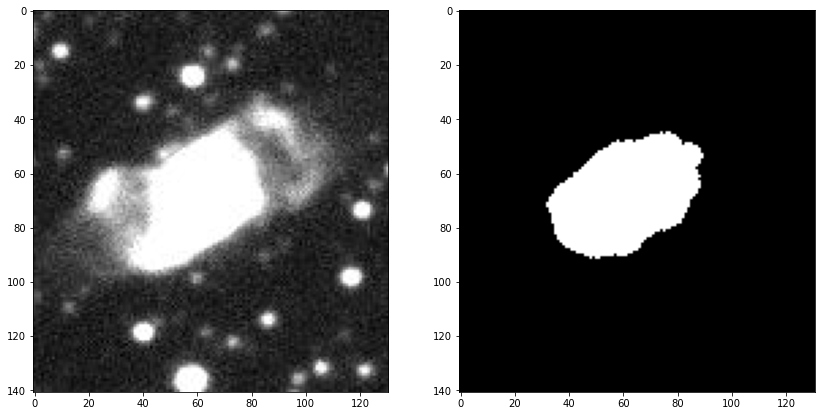

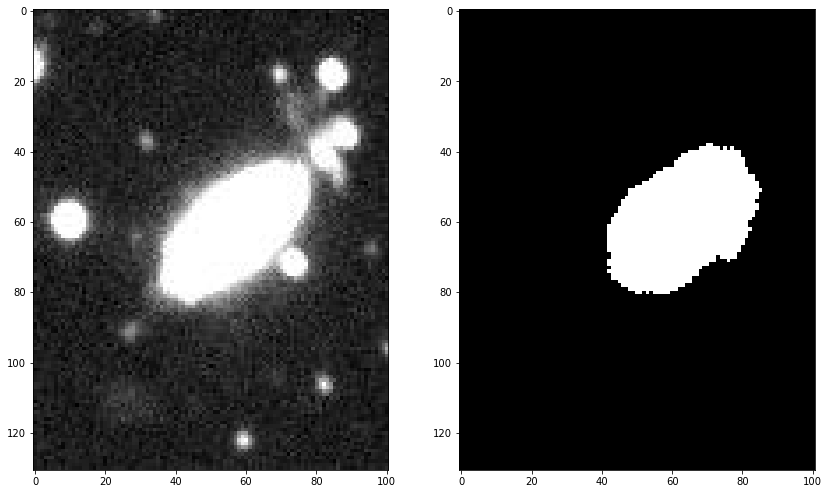

In [68]:
# Mostramos la salida del autocodificador convolucional entrenado anteriormente aplicado a distintas imágenes.
# Se muestra la imagen original y la imagen final. Si se quiere ver los pasos intermedios se puede indicar show_intermediate_steps=True.
    
for im_name in ['stem1.jpg', 'stem2.jpg', 'im3.jpg', 'im4.jpg', 'im5.jpg', 'im6.jpg', 'im7.jpg', 'im8.jpg']:
    show_conv_autoencoder_output(im_name, conv_autoencoder, block_size, show_intermediate_steps=False)
    

In [79]:
# Para evaluar los resultados de la red convolucional se pueden utilizar distintas métricas, como las explicadas en apartados anteriores.
from sklearn import metrics

# Evalúa el resultado obtenido al aplicar el autocodificador a una imagen.
def eval_autoencoder(im_name, conv_autoencoder, block_size):
    
    im, autoencoder_output, im_threshold, im_segm_binaria = process_im_with_autoencoder(im_name, conv_autoencoder, block_size)

    mask = imageio.imread('mask_' + im_name)

    mask = mask[:,:,0]

    print('\nIMAGEN ' + im_name + ':')
    
    # La métrica accuracy indica la proporción de píxeles segmentados correctamente, según la máscara.
    print(' Accuracy: ' + str(metrics.accuracy_score((mask > 0).astype(int).flatten(), im_segm_binaria.flatten())))
    
    # Las matrices de confusión también son muy utilizadas para evaluar el resultado de algoritmos de segmentación.
    conf_matrix = metrics.confusion_matrix((mask > 0).flatten(), im_segm_binaria.flatten())
    
    print(' Verdaderos negativos (TN):', conf_matrix[0, 0])

    print(' Falsos positivos (FP):', conf_matrix[0, 1])

    print(' Falsos negativos (FN):', conf_matrix[1, 0])

    print(' Verdaderos positivos (TP):', conf_matrix[1, 1])   

    

In [81]:
for im_name in ['stem1.jpg', 'stem2.jpg', 'im3.jpg', 'im4.jpg', 'im5.jpg', 'im6.jpg', 'im7.jpg', 'im8.jpg']:
    eval_autoencoder(im_name, conv_autoencoder, block_size)


IMAGEN stem1.jpg:
 Accuracy: 0.9430830064167606
 Verdaderos negativos (TN): 540142
 Falsos positivos (FP): 922
 Falsos negativos (FN): 35596
 Verdaderos positivos (TP): 64941

IMAGEN stem2.jpg:
 Accuracy: 0.9762585401927131
 Verdaderos negativos (TN): 80454
 Falsos positivos (FP): 1017
 Falsos negativos (FN): 1134
 Verdaderos positivos (TP): 7996

IMAGEN im3.jpg:
 Accuracy: 0.882599987077599
 Verdaderos negativos (TN): 38467
 Falsos positivos (FP): 1916
 Falsos negativos (FN): 3535
 Verdaderos positivos (TP): 2513

IMAGEN im4.jpg:
 Accuracy: 0.8975038348905313
 Verdaderos negativos (TN): 5785
 Falsos positivos (FP): 15
 Falsos negativos (FN): 720
 Verdaderos positivos (TP): 651

IMAGEN im5.jpg:
 Accuracy: 0.9335467154397196
 Verdaderos negativos (TN): 5567
 Falsos positivos (FP): 64
 Falsos negativos (FN): 372
 Verdaderos positivos (TP): 558

IMAGEN im6.jpg:
 Accuracy: 0.9682297900119682
 Verdaderos negativos (TN): 8229
 Falsos positivos (FP): 224
 Falsos negativos (FN): 68
 Verdadero